<a href="https://colab.research.google.com/github/fardinahsan84/Survey-on-Mental-Health-across-Canada/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cd "/content/drive/MyDrive/csv_files"

/content/drive/MyDrive/csv_files


In [7]:
data = pd.read_csv('Survey on Mental Health.csv')
data.head()

,Timestamp,Score,Q1. What's your Gender,Q2. What's your age?,Q3. What is the level of your degree?,Q4. How long have you been in Canada as an international student?,Q5. Did you face any difficulties finding accommodation?,Q6. How are you funding your education?,Q7. Is your loan,Q8. Have you experienced difficulties in finding part time employment?,Q9. How many hours you are working as for now at your part time job ?,Q10. Have you experienced any kind of discrimination in Canada?,Q11. I have faced culture-related issues in Canada,Q12. I am feeling stressed,Q13. Are you able to take out time for your personal life ?,Q14. How many hours do you sleep everyday?,Q15. Do you feel your job is too difficult for you to handle ?,Q16. Are you able to manage all your expenses?,Q17. Do you feel like yourself when you are with your housemates and friends ?,Q18. How easily are you able to find food options that cater to your dietary preferences or restrictions?,Q19. How often do you talk to your family members back home?,Q20. How frequently do you experience feelings of anxiety?,Q21. How do you feel the change in seasons affects your mental well-being?,Q22. Would you recommend your friends and family to pursue his/her further education in Canada?
0,11/1/2023 13:31,NaN,Male,17 - 21 years,Undergraduate,Second term,"Yes, it was very challenging.",Family support,Not applicable,"Yes, it was quite challenging",20 - 30 hours,Frequently,Disagree,Neutral,"Yes, often.",7-9 hours,Yes it is very challenging.,I can cover all my expenses.,"Yes, completely authentic.",Easily,Frequently,Frequently,Positively,I'm not sure
1,11/1/2023 18:26,NaN,Female,22 - 26 years,Graduate,Second year or higher,"Yes, it was very challenging.",Bank loan,High interest,"Yes, it was quite challenging",More than 30 hours,Frequently,Agree,Strongly agree,"Rarely, no time.",5-6 hours,Sometimes as it varies based on the workload.,"It's a bit tight, but I can manage.",Sometimes I conceal my true self,Easily,Everyday,Occasionally,Positively,It depends on individual circumstances.
2,11/1/2023 19:03,NaN,Male,22 - 26 years,Graduate,Second year or higher,"Yes, it was very challenging.",Bank loan,High interest,"Yes, it was quite challenging",More than 30 hours,Frequently,Neutral,Neutral,"Rarely, no time.",5-6 hours,Sometimes as it varies based on the workload.,I can cover all my expenses.,Sometimes I conceal my true self,Easily,Frequently,Frequently,Positively,"Not really, there are better options."
3,11/1/2023 19:19,NaN,Male,22 - 26 years,Graduate,Second year or higher,"Yes, it was very challenging.",Family support,High interest,"Yes, it was quite challenging",More than 30 hours,Frequently,Agree,Strongly agree,"Rarely, no time.",6-7 hours,Yes it is very challenging.,I can cover all my expenses.,"Yes, completely authentic.",Never,Frequently,Rarely,It does not affect me,It depends on individual circumstances.
4,11/1/2023 20:28,NaN,Male,22 - 26 years,Graduate,Second year or higher,"No, I encountered no issues.",Bank loan,Not applicable,"No, I'm not seeking employment currently",20 - 30 hours,Never,Disagree,Disagree,"Yes, often.",6-7 hours,Sometimes as it varies based on the workload.,"It's a bit tight, but I can manage.","Yes, completely authentic.",Sometimes,Frequently,Occasionally,It does not affect me,I'm not sure


In [8]:
for col in data.columns:
  col_name = col.split('.', 1)
  print(col_name[0], ':', len(data[col].unique()), 'labels')

Timestamp : 83 labels
Score : 1 labels
Q1 : 2 labels
Q2 : 4 labels
Q3 : 3 labels
Q4 : 4 labels
Q5 : 4 labels
Q6 : 8 labels
Q7 : 3 labels
Q8 : 4 labels
Q9 : 4 labels
Q10 : 4 labels
Q11 : 5 labels
Q12 : 5 labels
Q13 : 3 labels
Q14 : 5 labels
Q15 : 4 labels
Q16 : 3 labels
Q17 : 4 labels
Q18 : 4 labels
Q19 : 3 labels
Q20 : 3 labels
Q21 : 3 labels
Q22 : 5 labels


In [9]:
pd.get_dummies(data, drop_first =True).shape

(90, 148)

In [10]:
for col in data.columns:
  col_name = col.split('.', 1)
  data.rename(columns = {col : col_name[0]}, inplace = True)
data.head()


,Timestamp,Score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22
0,11/1/2023 13:31,NaN,Male,17 - 21 years,Undergraduate,Second term,"Yes, it was very challenging.",Family support,Not applicable,"Yes, it was quite challenging",20 - 30 hours,Frequently,Disagree,Neutral,"Yes, often.",7-9 hours,Yes it is very challenging.,I can cover all my expenses.,"Yes, completely authentic.",Easily,Frequently,Frequently,Positively,I'm not sure
1,11/1/2023 18:26,NaN,Female,22 - 26 years,Graduate,Second year or higher,"Yes, it was very challenging.",Bank loan,High interest,"Yes, it was quite challenging",More than 30 hours,Frequently,Agree,Strongly agree,"Rarely, no time.",5-6 hours,Sometimes as it varies based on the workload.,"It's a bit tight, but I can manage.",Sometimes I conceal my true self,Easily,Everyday,Occasionally,Positively,It depends on individual circumstances.
2,11/1/2023 19:03,NaN,Male,22 - 26 years,Graduate,Second year or higher,"Yes, it was very challenging.",Bank loan,High interest,"Yes, it was quite challenging",More than 30 hours,Frequently,Neutral,Neutral,"Rarely, no time.",5-6 hours,Sometimes as it varies based on the workload.,I can cover all my expenses.,Sometimes I conceal my true self,Easily,Frequently,Frequently,Positively,"Not really, there are better options."
3,11/1/2023 19:19,NaN,Male,22 - 26 years,Graduate,Second year or higher,"Yes, it was very challenging.",Family support,High interest,"Yes, it was quite challenging",More than 30 hours,Frequently,Agree,Strongly agree,"Rarely, no time.",6-7 hours,Yes it is very challenging.,I can cover all my expenses.,"Yes, completely authentic.",Never,Frequently,Rarely,It does not affect me,It depends on individual circumstances.
4,11/1/2023 20:28,NaN,Male,22 - 26 years,Graduate,Second year or higher,"No, I encountered no issues.",Bank loan,Not applicable,"No, I'm not seeking employment currently",20 - 30 hours,Never,Disagree,Disagree,"Yes, often.",6-7 hours,Sometimes as it varies based on the workload.,"It's a bit tight, but I can manage.","Yes, completely authentic.",Sometimes,Frequently,Occasionally,It does not affect me,I'm not sure


In [11]:
data.drop(columns=['Timestamp', 'Score'], inplace=True)
for col in data.columns:
  column_labels = data[col].unique()
  print(col, ':',column_labels)

Q1 : ['Male' 'Female']
Q2 : ['17 - 21 years' '22 - 26 years' 'More than 35 years' '27 - 35 years']
Q3 : ['Undergraduate' 'Graduate' 'Diploma']
Q4 : ['Second term' 'Second year or higher' 'First term' 'Third term']
Q5 : ['Yes, it was very challenging.' 'No, I encountered no issues.'
 'I encountered no issues because I had references' "I'm living on-campus"]
Q6 : ['Family support' 'Bank loan' 'Self-funded' 'Family support, Bank loan'
 'Bank loan, Self-funded' 'Family support, Self-funded'
 'Grants / Scholarship' 'Family support, Bank loan, Self-funded']
Q7 : ['Not applicable' 'High interest' 'Low interest']
Q8 : ['Yes, it was quite challenging'
 "No, I'm not seeking employment currently"
 'Not at all, I secured employment smoothly'
 "I'm currently seeking employment"]
Q9 : ['20 - 30 hours' 'More than 30 hours' 'Less than 20 hours'
 'Not Applicable']
Q10 : ['Frequently' 'Never' 'Occasionally' 'Rarely']
Q11 : ['Disagree' 'Agree' 'Neutral' 'Strongly Disagree' 'Strongly Agree']
Q12 : ['Neutr

In [12]:
columns_to_encode = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8','Q9', 'Q10', 'Q11', 'Q12','Q13', 'Q14', 'Q15', 'Q16','Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22']

In [13]:
data_to_test = data

In [14]:
data_to_test.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22
0,Male,17 - 21 years,Undergraduate,Second term,"Yes, it was very challenging.",Family support,Not applicable,"Yes, it was quite challenging",20 - 30 hours,Frequently,Disagree,Neutral,"Yes, often.",7-9 hours,Yes it is very challenging.,I can cover all my expenses.,"Yes, completely authentic.",Easily,Frequently,Frequently,Positively,I'm not sure
1,Female,22 - 26 years,Graduate,Second year or higher,"Yes, it was very challenging.",Bank loan,High interest,"Yes, it was quite challenging",More than 30 hours,Frequently,Agree,Strongly agree,"Rarely, no time.",5-6 hours,Sometimes as it varies based on the workload.,"It's a bit tight, but I can manage.",Sometimes I conceal my true self,Easily,Everyday,Occasionally,Positively,It depends on individual circumstances.
2,Male,22 - 26 years,Graduate,Second year or higher,"Yes, it was very challenging.",Bank loan,High interest,"Yes, it was quite challenging",More than 30 hours,Frequently,Neutral,Neutral,"Rarely, no time.",5-6 hours,Sometimes as it varies based on the workload.,I can cover all my expenses.,Sometimes I conceal my true self,Easily,Frequently,Frequently,Positively,"Not really, there are better options."
3,Male,22 - 26 years,Graduate,Second year or higher,"Yes, it was very challenging.",Family support,High interest,"Yes, it was quite challenging",More than 30 hours,Frequently,Agree,Strongly agree,"Rarely, no time.",6-7 hours,Yes it is very challenging.,I can cover all my expenses.,"Yes, completely authentic.",Never,Frequently,Rarely,It does not affect me,It depends on individual circumstances.
4,Male,22 - 26 years,Graduate,Second year or higher,"No, I encountered no issues.",Bank loan,Not applicable,"No, I'm not seeking employment currently",20 - 30 hours,Never,Disagree,Disagree,"Yes, often.",6-7 hours,Sometimes as it varies based on the workload.,"It's a bit tight, but I can manage.","Yes, completely authentic.",Sometimes,Frequently,Occasionally,It does not affect me,I'm not sure


In [15]:
label_Q1 = {"Male": 1, "Female": 2}
label_Q2 = {"17 - 21 years": 1, "22 - 26 years": 2, "27 - 35 years": 3, "More than 35 years": 4}
label_Q3 = {"Diploma": 1, "Undergraduate": 2,  "Graduate": 3}
label_Q4 = {"First term": 1, "Second term": 2, "Third term": 3, "Second year or higher": 4}
label_Q5 = {"Yes, it was very challenging.": 1, "No, I encountered no issues.": 2 , "I encountered no issues because I had references": 3, "I'm living on-campus": 4}
label_Q6 = {"Male": 1, "Female": 2}
label_Q7 = {"Low interest": -1, "Not applicable": 0, "High interest": 1}
label_Q8 = {"Yes, it was quite challenging": 1, "I'm currently seeking employment": 2, "Not at all, I secured employment smoothly": 3, "No, I'm not seeking employment currently": 4}
label_Q9 = {"Not Applicable": 0, "Less than 20 hours": 1, "20 - 30 hours":2, "More than 30 hours":3}
label_Q10 = {"Never": 0, "Rarely": 1, "Occasionally":2, "Frequently":3}
label_Q13= {"Rarely, no time.": 0, "Sometimes, not much.": 1, "Yes, often.":2}
label_Q14= {"It varies.": 0, "Less than 5 hours": 1, "5-6 hours": 2, "6-7 hours": 3, "7-9 hours": 4}
label_Q15= {"I don't have a part-time job or full time job":0, "No, it's manageable.":1 ,"Sometimes as it varies based on the workload.":2, "Yes it is very challenging.": 3}
label_Q11_Q12 = {"Strongly Disagree": -2, "Strongly disagree": -2, "Disagree": -1, "Neutral": 0, "Agree":1, "Strongly Agree":2, "Strongly agree":2 }
label_Q16 = {"I struggle to make ends meet.": 1, "It's a bit tight, but I can manage.": 2, "I can cover all my expenses.":3}
label_Q17= {"I don't have housemates or many friends.": -1, "Not always, I feel pressure to conform.": 0, "Sometimes I conceal my true self":1,"Yes, completely authentic.":2}
label_Q18= {"Never": 0, "Rarely": 1, "Sometimes":2, "Easily":3}
label_Q19= {"Rarely": 0,"Once a week":1, "Frequently":2, "Everyday":3}
label_Q20= {"Rarely": 1, "Occasionally":2, "Frequently":3}
label_Q21= {"Negatively": -1, "It does not affect me": 0, "Positively":1}
label_Q22= {"Never": 0,"I'm not sure":1, "Not really, there are better options.": 2, "It depends on individual circumstances.":3, "Absolutely, it's a great choice.":4}
data_to_test = data_to_test.replace({"Q1": label_Q1, "Q2": label_Q2, "Q3": label_Q3, "Q4": label_Q4, "Q5": label_Q5, "Q7": label_Q7,"Q8": label_Q8, "Q9": label_Q9, "Q10": label_Q10, "Q11": label_Q11_Q12, "Q12": label_Q11_Q12, "Q13": label_Q13, "Q14": label_Q14,"Q15": label_Q15,
                                     "Q16": label_Q16, "Q17": label_Q17, "Q18": label_Q18, "Q19": label_Q19, "Q20": label_Q20,"Q21": label_Q21, "Q22": label_Q22})

print("Mapped:")
data_to_test.head(10)


Mapped:


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22
0,1,1,2,2,1,Family support,0,1,2,3,-1,0,2,4,3,3,2,3,2,3,1,1
1,2,2,3,4,1,Bank loan,1,1,3,3,1,2,0,2,2,2,1,3,3,2,1,3
2,1,2,3,4,1,Bank loan,1,1,3,3,0,0,0,2,2,3,1,3,2,3,1,2
3,1,2,3,4,1,Family support,1,1,3,3,1,2,0,3,3,3,2,0,2,1,0,3
4,1,2,3,4,2,Bank loan,0,4,2,0,-1,-1,2,3,2,2,2,2,2,2,0,1
5,1,2,3,4,1,Bank loan,1,1,3,0,-1,-1,2,4,1,3,2,2,3,3,0,3
6,1,2,3,4,2,Bank loan,0,1,2,2,1,-1,1,4,3,2,2,0,3,3,-1,2
7,1,2,2,4,3,Bank loan,1,1,2,0,-1,0,2,4,1,2,2,3,3,3,0,3
8,1,2,3,1,3,Family support,0,1,1,2,-2,-1,2,3,1,2,2,2,3,1,0,4
9,1,2,3,1,1,Bank loan,-1,3,1,0,-1,0,2,3,1,2,2,2,3,3,0,3


In [16]:
le = LabelEncoder()
data_to_test["Q6"] = le.fit_transform(data_to_test["Q6"])

In [17]:
data_to_test.head(10)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22
0,1,1,2,2,1,2,0,1,2,3,-1,0,2,4,3,3,2,3,2,3,1,1
1,2,2,3,4,1,0,1,1,3,3,1,2,0,2,2,2,1,3,3,2,1,3
2,1,2,3,4,1,0,1,1,3,3,0,0,0,2,2,3,1,3,2,3,1,2
3,1,2,3,4,1,2,1,1,3,3,1,2,0,3,3,3,2,0,2,1,0,3
4,1,2,3,4,2,0,0,4,2,0,-1,-1,2,3,2,2,2,2,2,2,0,1
5,1,2,3,4,1,0,1,1,3,0,-1,-1,2,4,1,3,2,2,3,3,0,3
6,1,2,3,4,2,0,0,1,2,2,1,-1,1,4,3,2,2,0,3,3,-1,2
7,1,2,2,4,3,0,1,1,2,0,-1,0,2,4,1,2,2,3,3,3,0,3
8,1,2,3,1,3,2,0,1,1,2,-2,-1,2,3,1,2,2,2,3,1,0,4
9,1,2,3,1,1,0,-1,3,1,0,-1,0,2,3,1,2,2,2,3,3,0,3


In [ ]:
def retrieveValue(lst, val):
  for key,value in lst.items():
      if value == val:
          print(key)

In [ ]:
retrieveValue(label_Q1, 1)

Male


In [18]:
data_to_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q1      90 non-null     int64
 1   Q2      90 non-null     int64
 2   Q3      90 non-null     int64
 3   Q4      90 non-null     int64
 4   Q5      90 non-null     int64
 5   Q6      90 non-null     int64
 6   Q7      90 non-null     int64
 7   Q8      90 non-null     int64
 8   Q9      90 non-null     int64
 9   Q10     90 non-null     int64
 10  Q11     90 non-null     int64
 11  Q12     90 non-null     int64
 12  Q13     90 non-null     int64
 13  Q14     90 non-null     int64
 14  Q15     90 non-null     int64
 15  Q16     90 non-null     int64
 16  Q17     90 non-null     int64
 17  Q18     90 non-null     int64
 18  Q19     90 non-null     int64
 19  Q20     90 non-null     int64
 20  Q21     90 non-null     int64
 21  Q22     90 non-null     int64
dtypes: int64(22)
memory usage: 15.6 KB


In [19]:
data_to_test.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.0000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.300000,2.288889,2.700000,2.411111,1.611111,2.800000,0.3000,1.522222,1.388889,1.100000,0.033333,0.700000,1.055556,2.555556,1.377778,2.077778,1.222222,2.066667,2.466667,2.011111,-0.166667,2.677778
std,0.460825,0.674486,0.661119,1.279874,0.920362,2.214356,0.6439,0.889739,0.932490,0.924692,1.043439,1.021675,0.676427,1.152536,0.894148,0.640010,0.845049,0.831946,0.673745,0.814123,0.722822,0.946048
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.0000,1.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,1.000000,1.000000,-1.000000,0.000000
25%,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000,0.0000,1.000000,1.000000,0.000000,-1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,-1.000000,2.000000
50%,1.000000,2.000000,3.000000,2.500000,1.000000,2.000000,0.0000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000,3.000000,2.000000,0.000000,3.000000
75%,2.000000,2.750000,3.000000,4.000000,2.000000,4.000000,1.0000,2.000000,2.000000,2.000000,1.000000,1.000000,1.750000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,0.000000,3.000000
max,2.000000,4.000000,3.000000,4.000000,4.000000,7.000000,1.0000,4.000000,3.000000,3.000000,2.000000,2.000000,2.000000,4.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,1.000000,4.000000


<ipython-input-52-dab403939492>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_to_test['Q5'])


<Axes: xlabel='Q5', ylabel='Density'>

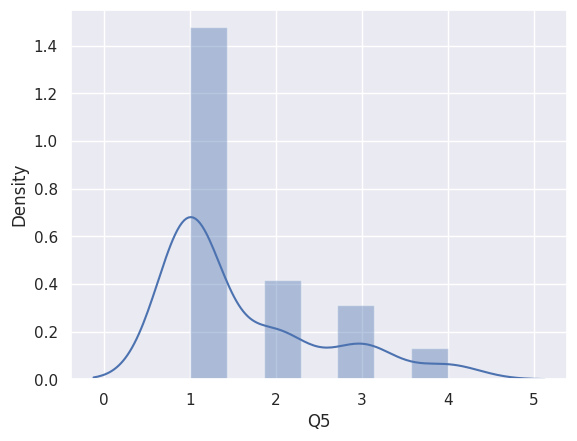

In [52]:
sns.distplot(data_to_test['Q5'])

##Transforming the data
Clustering models are distance-based algorithms. In order to measure similarities between observations and form clusters they use a distance metric. So, features with high ranges will have a bigger influence on the clustering. Therefore, standardization is required before building a clustering model. The primary purpose of data standardization is to improve data quality, reduce costs, and better decision-making. Data standardization can also help to enhance communication and collaboration between different teams and departments.

In [20]:
ss = StandardScaler()

In [23]:
X = data_to_test
data_to_test[['Q1_T', 'Q2_T', 'Q3_T', 'Q4_T', 'Q5_T', 'Q6_T', 'Q7_T', 'Q8_T','Q9_T', 'Q10_T', 'Q11_T', 'Q12_T','Q13_T', 'Q14_T', 'Q15_T', 'Q16_T','Q17_T', 'Q18_T', 'Q19_T', 'Q20_T', 'Q21_T', 'Q22_T']] = ss.fit_transform(X)

In [24]:
data_to_test.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q1_T,Q2_T,Q3_T,Q4_T,Q5_T,Q6_T,Q7_T,Q8_T,Q9_T,Q10_T,Q11_T,Q12_T,Q13_T,Q14_T,Q15_T,Q16_T,Q17_T,Q18_T,Q19_T,Q20_T,Q21_T,Q22_T
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.0000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01
mean,1.300000,2.288889,2.700000,2.411111,1.611111,2.800000,0.3000,1.522222,1.388889,1.100000,0.033333,0.700000,1.055556,2.555556,1.377778,2.077778,1.222222,2.066667,2.466667,2.011111,-0.166667,2.677778,-8.635068e-17,2.565849e-16,-2.738550e-16,8.018277e-17,-2.220446e-17,7.894919e-17,-2.652199e-17,9.128500e-17,2.590520e-17,-1.574358e-16,2.343804e-17,7.401487e-17,-5.427757e-17,1.696174e-16,6.414622e-17,-2.362308e-16,-9.868649e-17,-1.998401e-16,-1.480297e-16,4.440892e-17,3.299830e-17,1.739349e-16
std,0.460825,0.674486,0.661119,1.279874,0.920362,2.214356,0.6439,0.889739,0.932490,0.924692,1.043439,1.021675,0.676427,1.152536,0.894148,0.640010,0.845049,0.831946,0.673745,0.814123,0.722822,0.946048,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.0000,1.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,-6.546537e-01,-1.921626e+00,-2.585803e+00,-1.108716e+00,-6.677098e-01,-1.271560e+00,-2.030259e+00,-5.902269e-01,-1.497785e+00,-1.196249e+00,-1.959602e+00,-2.657524e+00,-1.569230e+00,-2.229754e+00,-1.549516e+00,-1.693435e+00,-2.644429e+00,-2.498051e+00,-2.189082e+00,-1.248921e+00,-1.159347e+00,-2.846346e+00
25%,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000,0.0000,1.000000,1.000000,0.000000,-1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,-1.000000,2.000000,-6.546537e-01,-4.307092e-01,4.563181e-01,-1.108716e+00,-6.677098e-01,-3.633029e-01,-4.685213e-01,-5.902269e-01,-4.193798e-01,-1.196249e+00,-9.958635e-01,-6.889877e-01,-8.259106e-02,-4.847292e-01,-4.248672e-01,-1.222067e-01,-2.644429e-01,-8.058230e-02,-6.965260e-01,-1.248921e+00,-1.159347e+00,-7.204445e-01
50%,1.000000,2.000000,3.000000,2.500000,1.000000,2.000000,0.0000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000,3.000000,2.000000,0.000000,3.000000,-6.546537e-01,-4.307092e-01,4.563181e-01,6.984037e-02,-6.677098e-01,-3.633029e-01,-4.685213e-01,-5.902269e-01,-4.193798e-01,-1.087499e-01,-3.212463e-02,2.952804e-01,-8.259106e-02,3.877834e-01,-4.248672e-01,-1.222067e-01,-2.644429e-01,-8.058230e-02,7.960298e-01,-1.372441e-02,2.318694e-01,3.425064e-01
75%,2.000000,2.750000,3.000000,4.000000,2.000000,4.000000,1.0000,2.000000,2.000000,2.000000,1.000000,1.000000,1.750000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,0.000000,3.000000,1.527525e+00,6.874782e-01,4.563181e-01,1.248397e+00,4.249062e-01,5.449544e-01,1.093216e+00,5.399948e-01,6.590254e-01,9.787492e-01,9.316142e-01,2.952804e-01,1.032388e+00,3.877834e-01,6.997814e-01,-1.222067e-01,9.255503e-01,1.128152e+00,7.960298e-01,1.221472e+00,2.318694e-01,3.425064e-01
max,2.000000,4.000000,3.000000,4.000000,4.000000,7.000000,1.0000,4.000000,3.000000,3.000000,2.000000,2.000000,2.000000,4.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,1.000000,4.000000,1.527525e+00,2.551124e+00,4.563181e-01,1.248397e+00,2.610138e+00,1.907340e+00,1.093216e+00,2.

##Identifying Optimum Number of Clusters
There are a number of ways to identify the optimum number of clusters. The method we are going to look at below is known as the Elbow method.
The Elbow plot allows us to plot the inertia, which is a measure of how well the data was

In [25]:
def optimise_k_means(data, k_max):
  wcss=[]
  for i in range(1,k_max):
    kmeans = KMeans(i)
    kmeans.fit(data)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

  number_clusters = range(1,k_max)
  plt.plot(number_clusters,wcss)
  plt.title('The Elbow Method')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

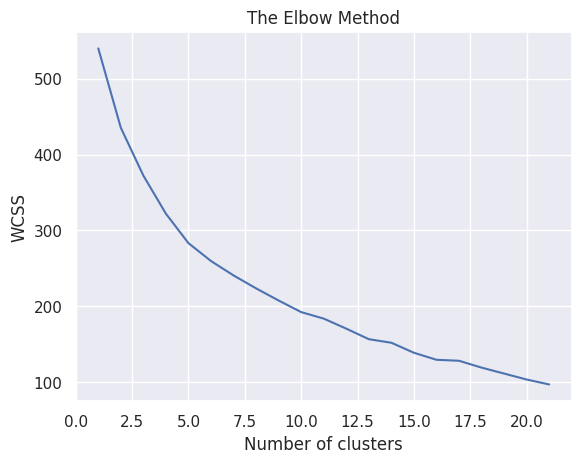

In [27]:
optimise_k_means(data_to_test[['Q5_T', 'Q6_T', 'Q7_T', 'Q8_T','Q9_T', 'Q10_T']], 22)

In [42]:
data_to_test = data_to_test.drop('kmeans_4', axis = 1)

In [43]:
c_clustering = ['Q5_T', 'Q6_T', 'Q7_T', 'Q8_T','Q9_T', 'Q10_T']
kmeans = KMeans(5)
kmeans.fit(data_to_test[c_clustering])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [44]:
data_to_test['kmeans_5'] = kmeans.labels_

In [45]:
data_to_test

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q1_T,Q2_T,Q3_T,Q4_T,Q5_T,Q6_T,Q7_T,Q8_T,Q9_T,Q10_T,Q11_T,Q12_T,Q13_T,Q14_T,Q15_T,Q16_T,Q17_T,Q18_T,Q19_T,Q20_T,Q21_T,Q22_T,kmeans_5
0,1,1,2,2,1,2,0,1,2,3,-1,0,2,4,3,3,2,3,2,3,1,1,-0.654654,-1.921626,-1.064742,-0.323012,-0.667710,-0.363303,-0.468521,-0.590227,0.659025,2.066248,-0.995863,-0.688988,1.404048,1.260296,1.824430,1.449022,0.925550,1.128152,-0.696526,1.221472,1.623086,-1.783395,1
1,2,2,3,4,1,0,1,1,3,3,1,2,0,2,2,2,1,3,3,2,1,3,1.527525,-0.430709,0.456318,1.248397,-0.667710,-1.271560,1.093216,-0.590227,1.737431,2.066248,0.931614,1.279548,-1.569230,-0.484729,0.699781,-0.122207,-0.264443,1.128152,0.796030,-0.013724,1.623086,0.342506,1
2,1,2,3,4,1,0,1,1,3,3,0,0,0,2,2,3,1,3,2,3,1,2,-0.654654,-0.430709,0.456318,1.248397,-0.667710,-1.271560,1.093216,-0.590227,1.737431,2.066248,-0.032125,-0.688988,-1.569230,-0.484729,0.699781,1.449022,-0.264443,1.128152,-0.696526,1.221472,1.623086,-0.720445,1
3,1,2,3,4,1,2,1,1,3,3,1,2,0,3,3,3,2,0,2,1,0,3,-0.654654,-0.430709,0.456318,1.248397,-0.667710,-0.363303,1.093216,-0.590227,1.737431,2.066248,0.931614,1.279548,-1.569230,0.387783,1.824430,1.449022,0.925550,-2.498051,-0.696526,-1.248921,0.231869,0.342506,1
4,1,2,3,4,2,0,0,4,2,0,-1,-1,2,3,2,2,2,2,2,2,0,1,-0.654654,-0.430709,0.456318,1.248397,0.424906,-1.271560,-0.468521,2.800438,0.659025,-1.196249,-0.995863,-1.673256,1.404048,0.387783,0.699781,-0.122207,0.925550,-0.080582,-0.696526,-0.013724,0.231869,-1.783395,0
5,1,2,3,4,1,0,1,1,3,0,-1,-1,2,4,1,3,2,2,3,3,0,3,-0.654654,-0.430709,0.456318,1.248397,-0.667710,-1.271560,1.093216,-0.590227,1.737431,-1.196249,-0.995863,-1.673256,1.404048,1.260296,-0.424867,1.449022,0.925550,-0.080582,0.796030,1.221472,0.231869,0.342506,2
6,1,2,3,4,2,0,0,1,2,2,1,-1,1,4,3,2,2,0,3,3,-1,2,-0.654654,-0.430709,0.456318,1.248397,0.424906,-1.271560,-0.468521,-0.590227,0.659025,0.978749,0.931614,-1.673256,-0.082591,1.260296,1.824430,-0.122207,0.925550,-2.498051,0.796030,1.221472,-1.159347,-0.720445,1
7,1,2,2,4,3,0,1,1,2,0,-1,0,2,4,1,2,2,3,3,3,0,3,-0.654654,-0.430709,-1.064742,1.248397,1.517522,-1.271560,1.093216,-0.590227,0.659025,-1.196249,-0.995863,-0.688988,1.404048,1.260296,-0.424867,-0.122207,0.925550,1.128152,0.796030,1.221472,0.231869,0.342506,3
8,1,2,3,1,3,2,0,1,1,2,-2,-1,2,3,1,2,2,2,3,1,0,4,-0.654654,-0.430709,0.456318,-1.108716,1.517522,-0.363303,-0.468521,-0.590227,-0.419380,0.978749,-1.959602,-1.673256,1.404048,0.387783,-0.424867,-0.122207,0.925550,-0.080582,0.796030,-1.248921,0.231869,1.405457,3
9,1,2,3,1,1,0,-1,3,1,0,-1,0,2,3,1,2,2,2,3,3,0,3,-0.654654,-0.430709,0.456318,-1.108716,-0.667710,-1.271560,-2.030259,1.670216,-0.419380,-1.196249,-0.995863,-0.688988,1.404048,0.387783,-0.424867,-0.122207,0.925550,-0.080582,0.796030,1.221472,0.231869,0.342506,0


In [46]:
identified_clusters = kmeans.fit_predict(data_to_test[['Q5_T', 'Q6_T', 'Q7_T', 'Q8_T','Q9_T', 'Q10_T']])
identified_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 2, 1, 0, 4, 4, 3, 1, 2, 1, 4, 0, 3, 0, 3, 0, 4, 1, 0,
       0, 1, 4, 1, 3, 1, 0, 0, 0, 0, 2, 0, 3, 1, 4, 3, 0, 2, 1, 4, 1, 3,
       4, 3, 2, 1, 3, 3, 1, 1, 3, 4, 3, 2, 3, 2, 0, 2, 1, 0, 1, 3, 0, 0,
       2, 3, 1, 1, 1, 4, 1, 2, 0, 4, 3, 3, 2, 0, 1, 3, 2, 2, 2, 3, 1, 2,
       3, 0], dtype=int32)

Text(0, 0.5, 'Funding')

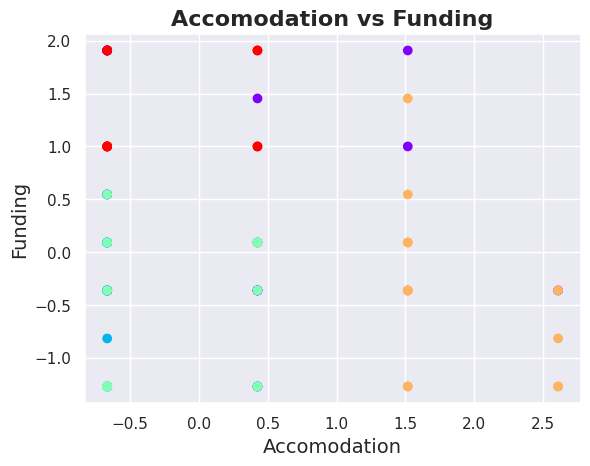

In [51]:
data_with_clusters = data_to_test.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.scatter(data_with_clusters['Q5_T'],data_with_clusters['Q6_T'],  c=data_to_test['kmeans_5'],cmap='rainbow')
plt.title('Accomodation vs Funding', fontsize=16, fontweight="bold")
plt.xlabel('Accomodation', fontsize=14)
plt.ylabel('Funding', fontsize=14)

In [ ]:
from IPython.display import FileLink, FileLinks

data_to_test.to_csv('/content/drive/MyDrive/csv_files/LabelledData.csv', index=False)

FileLinks('/content/drive/MyDrive/csv_files/')

/content/drive/MyDrive/csv_files/
  posts.csv
  post_history.csv
  votes.csv
  users.csv
  comments.csv
  Country-data.csv
  test1.csv
  data.csv
  data.xlsx
  One_hot.csv
  Survey on Mental Health.csv
  One_hot_encoded.csv
  LabelledData.csv